In [1]:
pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

Input Folder untuk dibagi menjadi train dan val

In [2]:
base_dir = '/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto'

# Preprocessing

In [3]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1399 files [02:33,  9.10 files/s]


Menambahkan masing masing folder untuk train dan validation

In [4]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

In [6]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 977 images belonging to 7 classes.
Found 138 images belonging to 7 classes.
Found 284 images belonging to 7 classes.


# Visualisasi

In [8]:
class_name = ['A','B','C','D','E','F','G']

In [9]:
image, label = train_generator.next()

In [10]:
len(image)

32

In [11]:
label

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

In [12]:
print(image.shape)

(32, 150, 150, 3)


In [ ]:
# gambar = tf.reshape(image[3],(150,150))

In [ ]:
#plt.imshow(gambar)

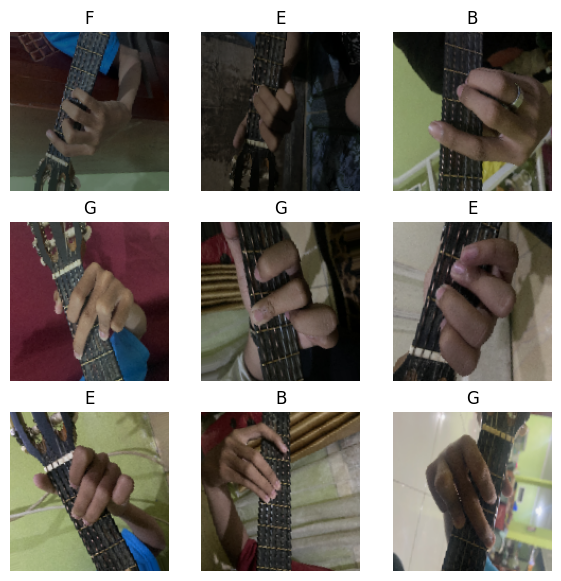

In [15]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


(32, 150, 150, 3)


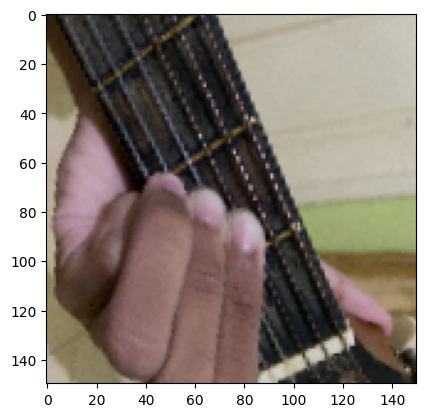

(32, 150, 150, 3)


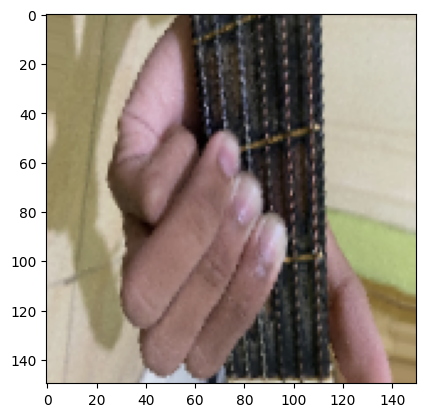

(32, 150, 150, 3)


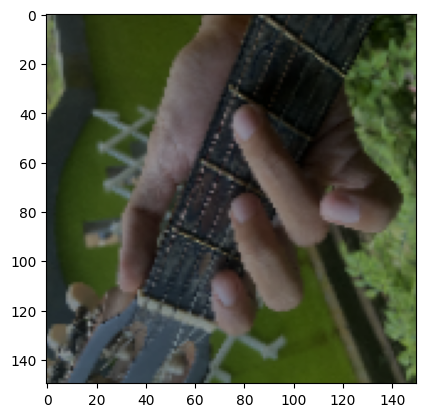

(32, 150, 150, 3)


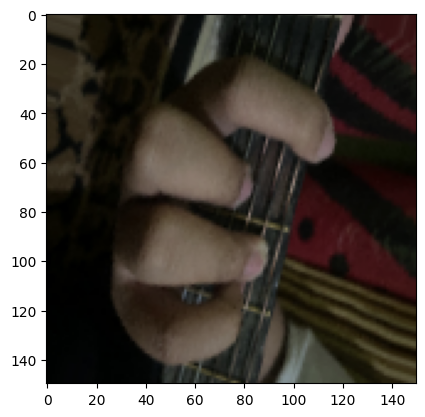

(32, 150, 150, 3)


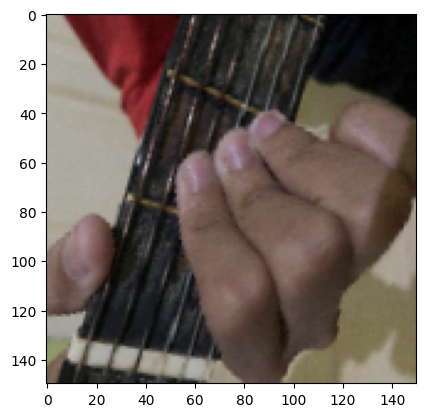

(32, 150, 150, 3)


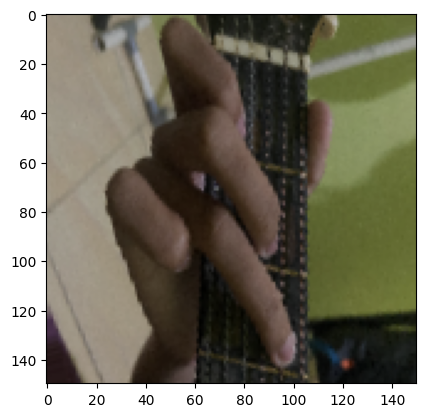

(32, 150, 150, 3)


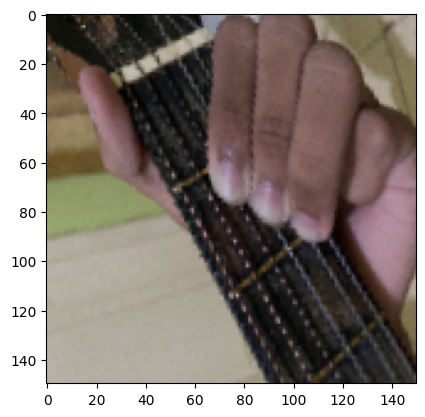

In [16]:
for _ in range(7):
  img, label = train_generator.next()
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[i])
  plt.show()

In [ ]:
#  upload = files.upload() buat pas make google colab

1/1 [==============================] - 0s 33ms/step
E:/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto/A/IMG_0336.jpeg
A


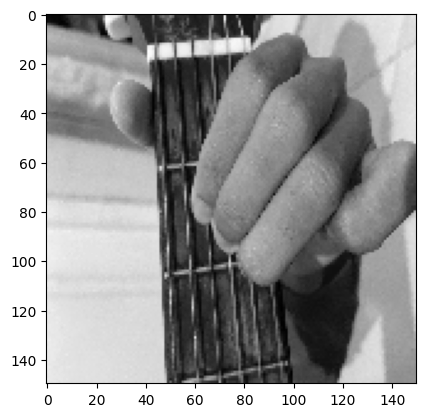

In [80]:
filename = askopenfilename()
img = keras.utils.load_img(filename, color_mode = 'grayscale', target_size=(150, 150))
imgplot = plt.imshow(img, cmap = 'gray')
x = img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('A')
elif classes[0][1] == 1:
  print('B')
elif classes[0][2] == 1:
  print('C')
elif classes[0][3] == 1:
  print('D')
elif classes[0][4] == 1:
  print('E')
elif classes[0][5] == 1:
  print('F')
else:
  print('G')